# Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\Xtras\TopCpG_NMI_Compare
df = pd.read_csv('NMI_Methylome_Male055_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\Xtras\TopCpG_NMI_Compare
(308, 708)


,APPRDX,cg16117273,cg24860848,cg11877812,cg04414720,cg07400453,cg15953070,cg06942628,cg12454778,cg19166896,...,cg09971881,cg14595332,cg22862094,cg04663998,cg00531525,cg09293319,cg17284116,cg12024822,cg07337480,cg12085407
0,0,0.271174,0.783908,0.877517,0.152477,0.897180,0.861183,0.892934,0.720849,0.928030,...,0.789874,0.831425,0.874163,0.914508,0.886064,0.922673,0.786093,0.446445,0.882963,0.218729
1,1,0.218033,0.760298,0.833439,0.053786,0.877265,0.870926,0.868634,0.609559,0.934171,...,0.746787,0.798525,0.879614,0.922025,0.875261,0.928808,0.868735,0.379969,0.858064,0.091214


# Running Model with different NMI cutoff

## RanFor 100 times, NMI 0.055 

In [3]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.7875
2
Mean accuracy: 0.8125
3
Mean accuracy: 0.83125
4
Mean accuracy: 0.75
5
Mean accuracy: 0.75
6
Mean accuracy: 0.825
7
Mean accuracy: 0.79375
8
Mean accuracy: 0.78125
9
Mean accuracy: 0.79375
10
Mean accuracy: 0.8125
11
Mean accuracy: 0.79375
12
Mean accuracy: 0.8125
13
Mean accuracy: 0.80625
14
Mean accuracy: 0.8375
15
Mean accuracy: 0.75
16
Mean accuracy: 0.81875
17
Mean accuracy: 0.775
18
Mean accuracy: 0.8
19
Mean accuracy: 0.80625
20
Mean accuracy: 0.74375
21
Mean accuracy: 0.85
22
Mean accuracy: 0.80625
23
Mean accuracy: 0.83125
24
Mean accuracy: 0.83125
25
Mean accuracy: 0.84375
26
Mean accuracy: 0.80625
27
Mean accuracy: 0.80625
28
Mean accuracy: 0.8125
29
Mean accuracy: 0.8125
30
Mean accuracy: 0.76875
31
Mean accuracy: 0.8125
32
Mean accuracy: 0.79375
33
Mean accuracy: 0.75625
34
Mean accuracy: 0.78125
35
Mean accuracy: 0.7875
36
Mean accuracy: 0.79375
37
Mean accuracy: 0.75
38
Mean accuracy: 0.76875
39
Mean accuracy: 0.80625
40
Mean accuracy: 0.7875
41

In [4]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Male055_100RF.csv", index=False)

0.7974375


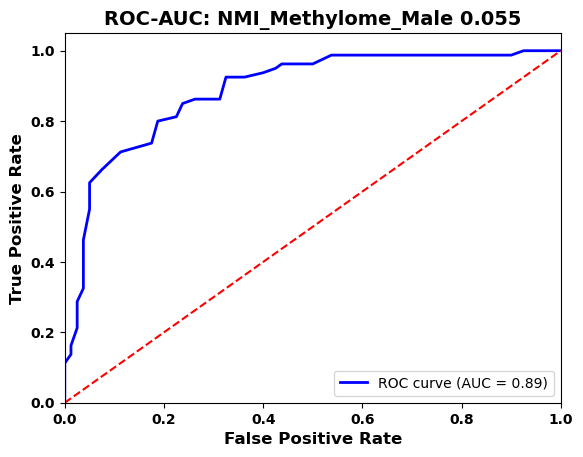

In [5]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI_Methylome_Male 0.055', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI_Methylome_Male055.svg')
plt.savefig('ROC_AUC_NMI_Methylome_Male055.pdf')
plt.show()


## RanFor 100 times, NMI 0.06

In [6]:
df = pd.read_csv('NMI_Methylome_Male06_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(308, 328)


,APPRDX,cg16117273,cg24860848,cg11877812,cg04414720,cg07400453,cg15953070,cg06942628,cg12454778,cg19166896,...,cg09372808,cg08109545,cg03769939,cg04824818,cg19056515,cg18868933,cg11206312,cg00295303,cg00113363,cg23377551
0,0,0.271174,0.783908,0.877517,0.152477,0.897180,0.861183,0.892934,0.720849,0.928030,...,0.859071,0.910721,0.817815,0.941467,0.966428,0.850839,0.021457,0.824603,0.021304,0.783802
1,1,0.218033,0.760298,0.833439,0.053786,0.877265,0.870926,0.868634,0.609559,0.934171,...,0.873619,0.911777,0.754973,0.948919,0.936251,0.893749,0.016610,0.883748,0.010358,0.767463


In [7]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.80625
2
Mean accuracy: 0.83125
3
Mean accuracy: 0.8125
4
Mean accuracy: 0.76875
5
Mean accuracy: 0.8125
6
Mean accuracy: 0.7875
7
Mean accuracy: 0.775
8
Mean accuracy: 0.83125
9
Mean accuracy: 0.7875
10
Mean accuracy: 0.80625
11
Mean accuracy: 0.83125
12
Mean accuracy: 0.79375
13
Mean accuracy: 0.7875
14
Mean accuracy: 0.80625
15
Mean accuracy: 0.76875
16
Mean accuracy: 0.76875
17
Mean accuracy: 0.8
18
Mean accuracy: 0.8125
19
Mean accuracy: 0.78125
20
Mean accuracy: 0.775
21
Mean accuracy: 0.84375
22
Mean accuracy: 0.775
23
Mean accuracy: 0.79375
24
Mean accuracy: 0.84375
25
Mean accuracy: 0.84375
26
Mean accuracy: 0.79375
27
Mean accuracy: 0.825
28
Mean accuracy: 0.80625
29
Mean accuracy: 0.8
30
Mean accuracy: 0.79375
31
Mean accuracy: 0.81875
32
Mean accuracy: 0.79375
33
Mean accuracy: 0.81875
34
Mean accuracy: 0.78125
35
Mean accuracy: 0.8
36
Mean accuracy: 0.8
37
Mean accuracy: 0.79375
38
Mean accuracy: 0.8125
39
Mean accuracy: 0.81875
40
Mean accuracy: 0.85
41


In [8]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Male06_100RF.csv", index=False)

0.8026249999999996


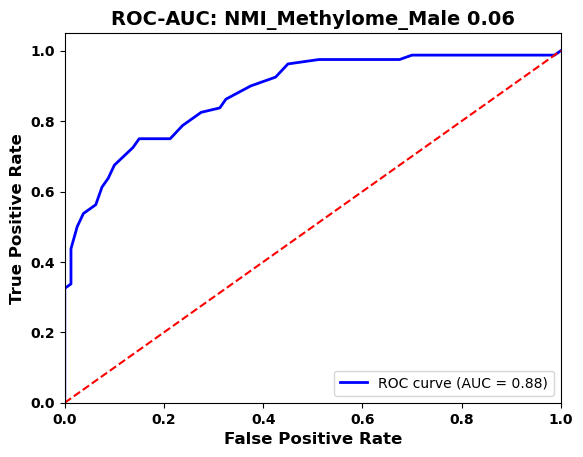

In [9]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI_Methylome_Male 0.06', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI_Methylome_Male06.svg')
plt.savefig('ROC_AUC_NMI_Methylome_Male06.pdf')
plt.show()


## RanFor 100 times, NMI 0.07

In [10]:
df = pd.read_csv('NMI_Methylome_Male07_Data.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(308, 68)


,APPRDX,cg16117273,cg24860848,cg11877812,cg04414720,cg07400453,cg15953070,cg06942628,cg12454778,cg19166896,...,cg02914044,cg04169248,cg00156743,cg19711613,cg04754315,cg12334949,cg24980453,cg27648238,cg01923140,cg01935989
0,0,0.271174,0.783908,0.877517,0.152477,0.897180,0.861183,0.892934,0.720849,0.928030,...,0.902843,0.880611,0.821042,0.84131,0.040118,0.018531,0.788784,0.845385,0.829051,0.890250
1,1,0.218033,0.760298,0.833439,0.053786,0.877265,0.870926,0.868634,0.609559,0.934171,...,0.914312,0.827945,0.862916,0.86089,0.021840,0.020056,0.808681,0.853576,0.776252,0.902143


In [11]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.76875
2
Mean accuracy: 0.75
3
Mean accuracy: 0.775
4
Mean accuracy: 0.71875
5
Mean accuracy: 0.79375
6
Mean accuracy: 0.76875
7
Mean accuracy: 0.74375
8
Mean accuracy: 0.7875
9
Mean accuracy: 0.725
10
Mean accuracy: 0.7875
11
Mean accuracy: 0.7875
12
Mean accuracy: 0.78125
13
Mean accuracy: 0.7875
14
Mean accuracy: 0.76875
15
Mean accuracy: 0.78125
16
Mean accuracy: 0.8125
17
Mean accuracy: 0.78125
18
Mean accuracy: 0.7625
19
Mean accuracy: 0.825
20
Mean accuracy: 0.7875
21
Mean accuracy: 0.79375
22
Mean accuracy: 0.79375
23
Mean accuracy: 0.7625
24
Mean accuracy: 0.8125
25
Mean accuracy: 0.78125
26
Mean accuracy: 0.76875
27
Mean accuracy: 0.81875
28
Mean accuracy: 0.75
29
Mean accuracy: 0.7375
30
Mean accuracy: 0.775
31
Mean accuracy: 0.8125
32
Mean accuracy: 0.8
33
Mean accuracy: 0.775
34
Mean accuracy: 0.75625
35
Mean accuracy: 0.775
36
Mean accuracy: 0.78125
37
Mean accuracy: 0.76875
38
Mean accuracy: 0.76875
39
Mean accuracy: 0.8125
40
Mean accuracy: 0.7875
41
M

In [12]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI_Methylome_Male07_100RF.csv", index=False)

0.7777500000000002


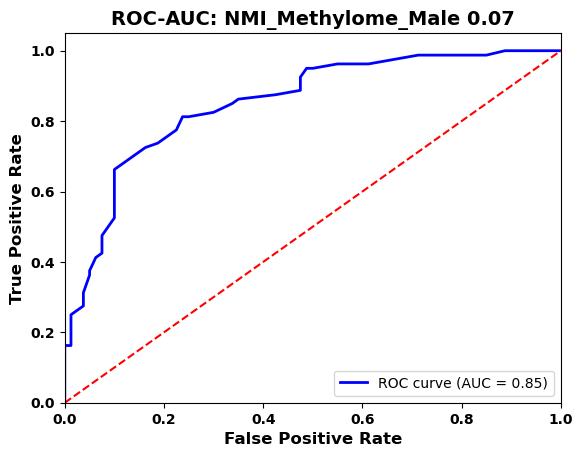

In [13]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI_Methylome_Male 0.07', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI_Methylome_Male07.svg')
plt.savefig('ROC_AUC_NMI_Methylome_Male07.pdf')
plt.show()
